<a href="https://colab.research.google.com/github/linozamora/ML/blob/main/copia_de_conectando_futuros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==1.1.3
!pip install joblib==1.1.0
!pip install mglearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 19.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Carga inicial del Dataset

In [5]:
df = pd.read_csv('https://media.githubusercontent.com/media/linozamora/ML/main/Beneficiarios_M_s_Familias_en_Acci_n.csv')
pd.set_option('display.max_columns', None) 

df.head(10)

<ipython-input-5-d0644e72e9a0>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://media.githubusercontent.com/media/linozamora/ML/main/Beneficiarios_M_s_Familias_en_Acci_n.csv')


,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,NombreMunicipioAtencion,Pais,TipoAsignacionBeneficio,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios
0,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
1,NO,13,13673,NO,NO ACTIVO,ND,2012-11-01,Mujer,ND,BOLIVAR,SANTA CATALINA,ND,ND,ND,TI,ND,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,21
2,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
3,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
4,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
5,NO,41,41770,NO,ACTIVO,ND,2012-11-01,Hombre,PRIMARIA,HUILA,SUAZA,ND,ND,EDUCACIÓN PRIMARIANUTRICIÓN MENOR,RC,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,2
6,NO,19,19256,NO,NO ACTIVO,ND,2013-02-01,Mujer,ND,CAUCA,EL TAMBO,ND,ND,ND,CC,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,63
7,ND,47,47318,NO,ACTIVO,ND,2012-12-01,Mujer,ND,MAGDALENA,GUAMAL,Colombia,MONETARIO,ND,CC,SISBEN,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1
8,ND,73,73217,NO,ACTIVO,ND,2013-02-01,Mujer,ND,TOLIMA,COYAIMA,ND,ND,NUTRICIÓN MENOR,No Definido,INDIGENAS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1
9,ND,13,13673,ND,ACTIVO,ND,2012-11-01,Hombre,ND,BOLIVAR,SANTA CATALINA,Colombia,ND,ND,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,2


# EDA (Exploratory Data Analysis) y Visualización

In [ ]:
# Verificando la información del Dataframe
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   bancarizado                        975 non-null    object
 1   codigodepartamentoatencion         1000 non-null   int64 
 2   codigomunicipioatencion            1000 non-null   int64 
 3   discapacidad                       1000 non-null   object
 4   estadobeneficiario                 1000 non-null   object
 5   etnia                              1000 non-null   object
 6   fechainscripcionbeneficiario       1000 non-null   object
 7   genero                             1000 non-null   object
 8   nivelescolaridad                   1000 non-null   object
 9   nombredepartamentoatencion         1000 non-null   object
 10  nombremunicipioatencion            1000 non-null   object
 11  pais                               1000 non-null   object
 12  tipoasi

Index(['bancarizado', 'codigodepartamentoatencion', 'codigomunicipioatencion',
       'discapacidad', 'estadobeneficiario', 'etnia',
       'fechainscripcionbeneficiario', 'genero', 'nivelescolaridad',
       'nombredepartamentoatencion', 'nombremunicipioatencion', 'pais',
       'tipoasignacionbeneficio', 'tipobeneficio', 'tipodocumento',
       'tipopoblacion', 'rangobeneficioconsolidadoasignado',
       'rangoultimobeneficioasignado', 'fechaultimobeneficioasignado',
       'rangoedad', 'titular', 'cantidaddebeneficiarios'],
      dtype='object')

In [6]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Bancarizado : ['SI' 'NO' 'ND' nan]
CodigoDepartamentoAtencion : [ 8 13 41 19 47 73 95 85 20 25 63 23 70 17 81  5 44 52 94 54 15 18 66 68
 86 91 76 50 88 11 27 99 97]
CodigoMunicipioAtencion : [ 8421 13673 41770 ... 15761 91669 97889]
Discapacidad : ['NO' 'ND' 'SI']
EstadoBeneficiario : ['ACTIVO' 'NO ACTIVO']
Etnia : ['AFROCOLOMBIANO – NEGRO' 'ND' 'INDIGENA' 'MESTIZO' 'RAIZAL'
 'AFROCOLOMBIANO - NEGRO' 'PALENQUERO' 'ROM O GITANO' 'ROM'
 'AFROCOLOMBIANO' 'SIN ESPECIFICAR']
FechaInscripcionBeneficiario : ['2012-12-01' '2012-11-01' '2013-02-01' '2014-05-01' '2012-10-01'
 '2013-01-01' '2015-04-01' '2018-09-01' '2018-11-01' '2016-06-01'
 '2018-05-01' '2015-06-01' '2017-06-01' '2013-06-01' '2016-12-01'
 '2016-07-01' '2013-10-01' '2013-07-01' '2013-12-01' '2018-03-01'
 '2016-11-01' '2013-04-01' '2015-09-01' '2014-08-01' '2013-11-01'
 '2017-10-01' '2015-10-01' '2015-05-01' '2015-08-01' '2017-07-01'
 '2013-09-01' '2015-03-01' '2014-10-01' '2015-01-01' '2014-07-01'
 '2015-11-01' '2016-09-01' '201

<Axes: >

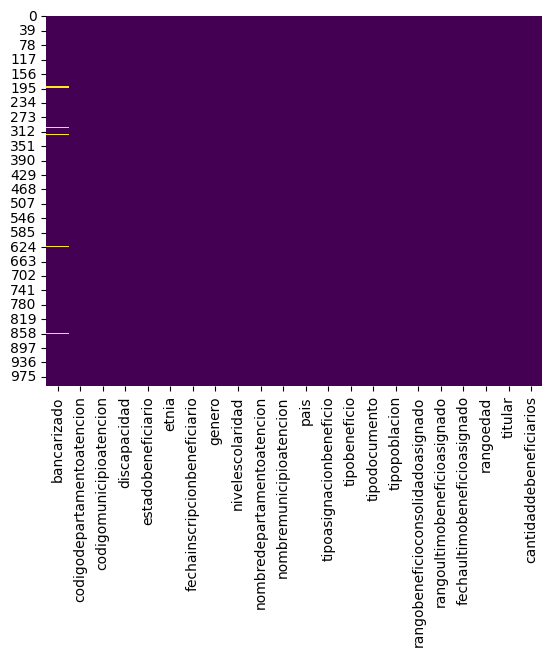

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')